In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\Olencia\AppData\Local\Temp\ipykernel_18140\277211369.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=df, ax=axes[0, 0], palette="Set2")
C:\Users\Olencia\AppData\Local\Temp\ipykernel_18140\277211369.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


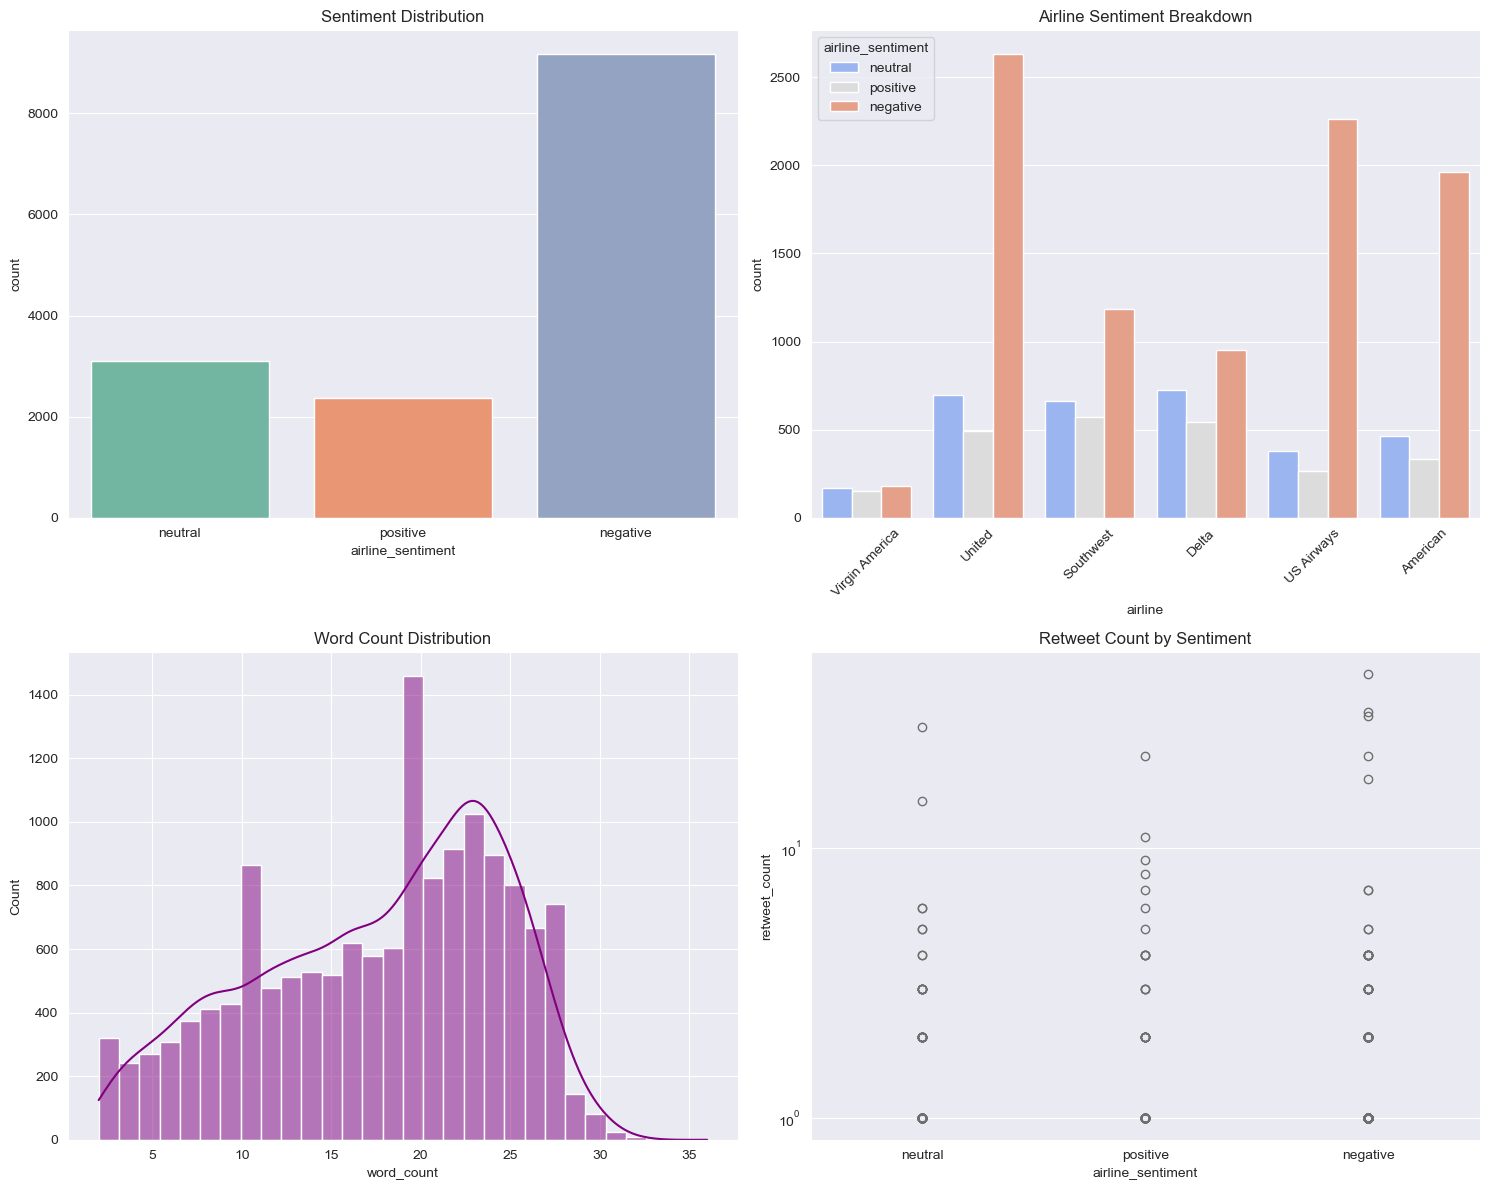

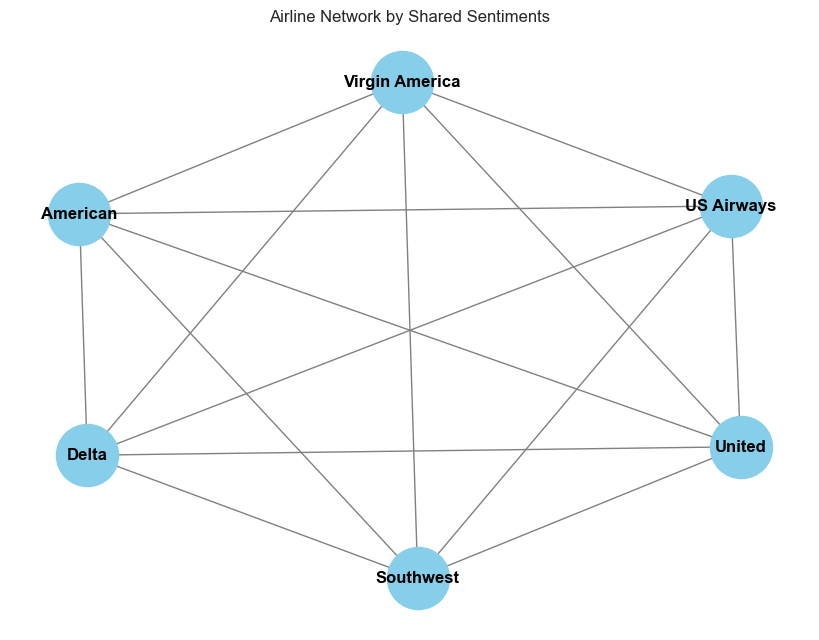

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load dataset
df = pd.read_csv("./Frontend/public/Tweets.csv")

# Clean inf values
df = df.replace([float("inf"), float("-inf")], pd.NA)

# Add word count
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Set style
sns.set_style("darkgrid")

# ======================
# 1. EDA PLOTS
# ======================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sentiment distribution
sns.countplot(x="airline_sentiment", data=df, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Sentiment Distribution")

# Airline vs Sentiment
sns.countplot(
    x="airline",
    hue="airline_sentiment",
    data=df,
    ax=axes[0, 1],
    palette="coolwarm"
)
axes[0, 1].set_title("Airline Sentiment Breakdown")
axes[0, 1].tick_params(axis="x", rotation=45)

# Word count histogram
sns.histplot(df["word_count"], bins=30, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Word Count Distribution")

# Retweet count vs sentiment
sns.boxplot(
    x="airline_sentiment",
    y="retweet_count",
    data=df,
    ax=axes[1, 1],
    palette="pastel"
)
axes[1, 1].set_title("Retweet Count by Sentiment")
axes[1, 1].set_yscale("log")

plt.tight_layout()
plt.savefig("./Frontend/public/eda.png", bbox_inches="tight")

# 👇 show in notebook
plt.show()

# then close to free memory
plt.close(fig)


# ======================
# 2. NETWORK GRAPH
# ======================
# Example: connect airlines if they share the same sentiment
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_color="skyblue",
    node_size=2000,
    font_size=12,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Airline Network by Shared Sentiments")

plt.savefig("./Frontend/public/network.png", bbox_inches="tight")

# 👇 show in notebook
plt.show()

plt.close()


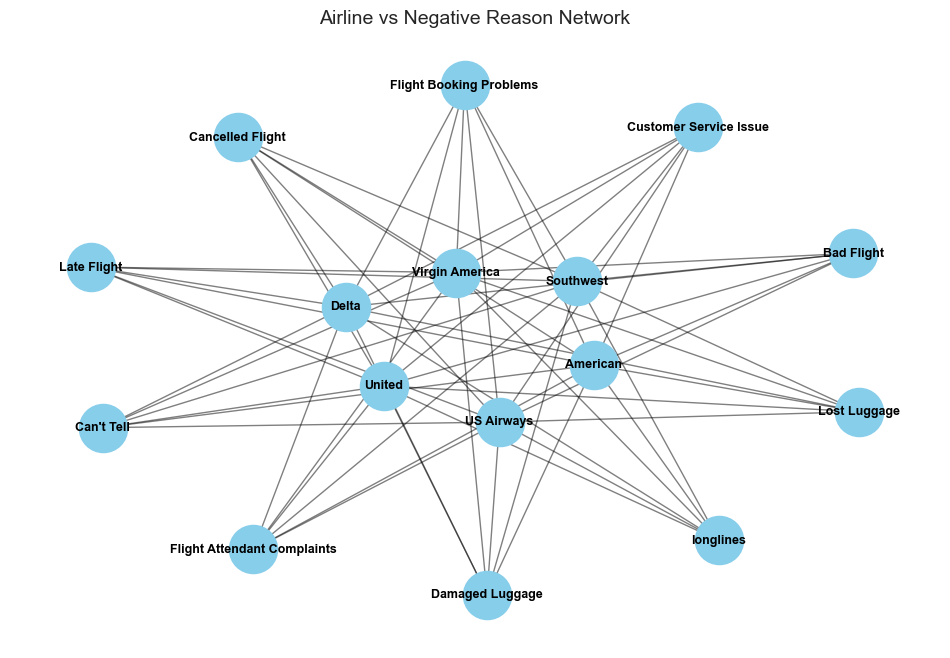

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter only negative tweets
neg_df = df[df["airline_sentiment"] == "negative"].dropna(subset=["negativereason"])

# Build edges: airline → negative reason
edges = list(zip(neg_df["airline"], neg_df["negativereason"]))

# Create bipartite graph
G = nx.Graph()
G.add_edges_from(edges)

# Draw
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color="skyblue")
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

plt.title("Airline vs Negative Reason Network", fontsize=14)
plt.axis("off")

# Save to your public folder for dashboard use
plt.savefig("./Frontend/public/negative_network.png", bbox_inches="tight")

# Show inside notebook
plt.show()

plt.close()
